In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats

Question 1
==========
In this question a class for bandit created with gaussian distribution. This class has two input parameters, $\mu$ and $\sigma^2$. The pull method returns a random number from the gaussian distribution with mean mu and variance $\sigma^2$. The update method updates the mean of the bandit using the new observation x.


In [2]:
# define the bandit class using guassian distribution
class Bandit:
    def __init__(self, mu, sigma2):
        self.mu = mu
        self.sigma2 = sigma2
        self.mean = 0
        self.N = 0

    def pull(self):
        return np.random.randn() + self.mu

    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x



In [3]:
# check bandit class
bandit = Bandit(0, 1)
print(bandit.pull())
bandit.update(1)


0.47568802374038205


Question 2
==========
In this question ten badits with different means are created. The means are $\mu = [0.2, -0.8, 1.5, 0.4, 1.2, -1.5, -0.2, -0.9, -0.5]$. The variance is $\sigma^2 = 1$. The plot shows the pdf of the bandits.

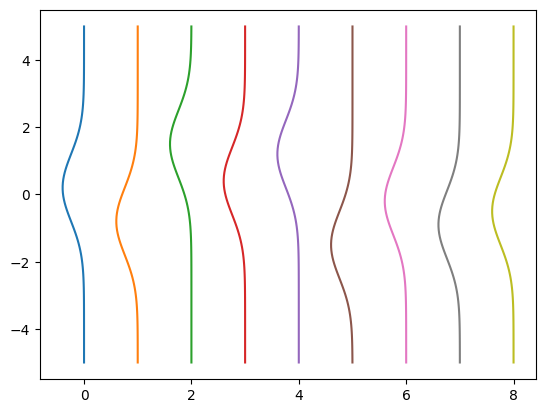

In [4]:
sigma2 = 1
mu = [0.2, -0.8, 1.5, 0.4, 1.2, -1.5, -0.2, -0.9, -0.5]
x = np.linspace(-5, 5, 100)
for i, m in enumerate(mu):
    plt.plot(i-stats.norm.pdf(x, m, np.sqrt(sigma2)), x)
plt.show()

Question 3
==========
In this question the greedy algorithm is implemented. The greedy algorithm selects the bandit with the highest mean. The plot shows the average reward as a function of the number of steps. The greedy algorithm converges to the bandit with the highest mean. The greedy algorithm is as below:
$$
j = \arg\max_{j} \hat{\mu}_j
$$

In [5]:
# define the greedy algorithm
def greedy(mu, sigma2, N):
    bandits = [Bandit(m, sigma2) for m in mu]
    rewards = np.empty(N)
    for i in range(N):
        # greedy
        j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        rewards[i] = x
    cumulative_average = np.cumsum(rewards) / (np.arange(N) + 1)
    return cumulative_average

The epsilon greedy algorithm is as below:
$$
\begin{align}
p &= \text{random number between 0 and 1}\\
j &= \begin{cases}
\text{random bandit } & \text{if } p < \epsilon\\
\arg\max_{j} \hat{\mu}_j & \text{otherwise}
\end{cases}
\end{align}
$$

In [6]:
# define the epsilon greedy algorithm
def epsilon_greedy(mu, sigma2, eps, N):
    bandits = [Bandit(m, sigma2) for m in mu]
    rewards = np.empty(N)
    for i in range(N):
        # epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(len(bandits))
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        rewards[i] = x
    cumulative_average = np.cumsum(rewards) / (np.arange(N) + 1)
    return cumulative_average

In [ ]:
# run the experiment
mu = [0.2, -0.8, 1.5, 0.4, 1.2, -1.5, -0.2, -0.9, -0.5]
sigma2 = 1
eps_1 = 0.01
eps_2 = 0.1
N = 2000
steps = 10000
c_1 = np.empty([N, steps])
c_2 = np.empty([N, steps])
c_3 = np.empty([N, steps])
for i in range(N):
    print(i)
    c_1[i, :] = greedy(mu, sigma2, steps)
    c_2[i, :] = epsilon_greedy(mu, sigma2, eps_1, steps)
    c_3[i, :] = epsilon_greedy(mu, sigma2, eps_2, steps)

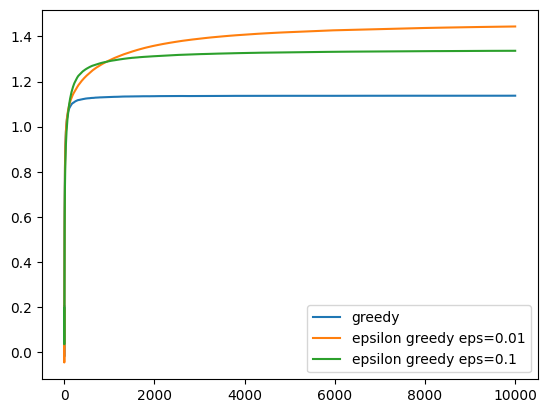

In [8]:
# plot the results
plt.plot(c_1.mean(axis=0), label='greedy')
plt.plot(c_2.mean(axis=0), label='epsilon greedy eps=0.01')
plt.plot(c_3.mean(axis=0), label='epsilon greedy eps=0.1')
plt.legend()
# plt.xscale('log')

Question 4
==========
In this question the softmax algorithm is implemented. The softmax algorithm selects the bandit with the highest mean. The plot shows the average reward as a function of the number of steps. The softmax algorithm converges to the bandit with the highest mean. The softmax algorithm is as below:
$$
\begin{align}
p_j &= \frac{\exp(\hat{\mu}_j/\tau)}{\sum_{k=1}^{K}\exp(\hat{\mu}_k/\tau)}\\
j &= \text{j$_{th}$ bandit with probability } p_j\\
\end{align}
$$

In [9]:
# softmax
def softmax(mu, sigma2, tau, N):
    bandits = [Bandit(m, sigma2) for m in mu]
    rewards = np.empty(N)
    for i in range(N):
        # softmax
        p = np.exp([b.mean/tau for b in bandits])
        p /= p.sum()
        j = np.random.choice(len(bandits), p=p)
        x = bandits[j].pull()
        bandits[j].update(x)
        rewards[i] = x
    cumulative_average = np.cumsum(rewards) / (np.arange(N) + 1)
    return cumulative_average

In [ ]:
# run the experiment
mu = [0.2, -0.8, 1.5, 0.4, 1.2, -1.5, -0.2, -0.9, -0.5]
sigma2 = 1
tau_1 = 1
tau_2 = 0.1
N = 2000
steps = 10000
c_4 = np.empty([N, steps])
c_5 = np.empty([N, steps])
for i in range(N):
    print(i)
    c_4[i, :] = softmax(mu, sigma2, tau_1, steps)
    c_5[i, :] = softmax(mu, sigma2, tau_2, steps)

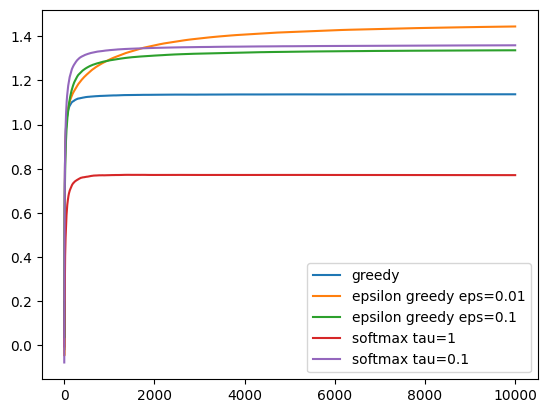

In [11]:
# plot the results
plt.plot(c_1.mean(axis=0), label='greedy')
plt.plot(c_2.mean(axis=0), label='epsilon greedy eps=0.01')
plt.plot(c_3.mean(axis=0), label='epsilon greedy eps=0.1')
plt.plot(c_4.mean(axis=0), label='softmax tau=1')
plt.plot(c_5.mean(axis=0), label='softmax tau=0.1')
plt.legend()
# plt.xscale('log')
plt.show()